In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Abstract

Numerical computations, by their nature, give rise to different types of errors. This assignment is set up to investigate how adding more terms to the Maclaurin expansion of exponential function affects the truncation error. It was discovered that adding more terms leads to the decrease of error until a breaking point, and at this point the error will remain constant. This happens because for large $n$ terms are treated as zeros by Python. With the increase of $x$ it took more terms to reach this breaking point. 

##Introduction

Truncation errors are associated with using finite amount of terms to approximate infinite series

Hypothesis:
* With the increase in $n$ truncation error will decrease until a certain point
* With the increase of $x$ the error will decay slower

This hypothesis will be tested by plotting graphs of error vs number of terms for several values of $x$
##Methodology
The following steps are performed for $x=1$, $x=2$ and $x=10$
* In Part A a function that estimates $e^x$ using $n$ terms is created:

In [2]:
def exp(x,n):
  exp=0
  for i in range(n+1):
    exp=exp+x**i/math.factorial(i)
  return exp

* In Part B errors after adding each term are calculated and stored in array. Then errors are graphed versus the number of terms

In [6]:
def error(x,n):
  error=[]
  part_c=[]
  for i in range(n):
    err=(np.e**x-exp(x,i))/np.e**x
    error.append(err)
  return abs(np.array(error))

* In Part C the number of terms required to reach precision of $10^{-15}$ is calculated:

In [7]:
def part_c(error):
  n=len(error)
  for i in range(n):
    if error[i]<10**(-15):
      print("Given precision is reached at n =",i)
      break

* In Part D behavior before and after reaching precision of $10^{−15}$ will be compared
* In Part E and F results for $x=2$ and $x=10$ will be compared to $x=1$ case
#Results
###Part A and B

In [8]:
error1=error(1,50)
error2=error(2,50)
error10=error(10,50)

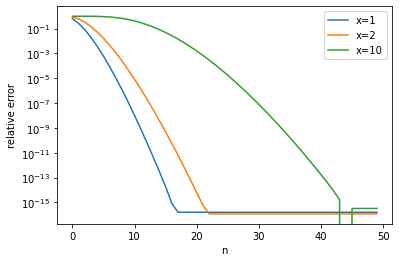

In [9]:
plt.plot(error1,label="x=1")
plt.plot(error2,label="x=2")
plt.plot(error10,label="x=10")
plt.xlabel('n')
plt.ylabel('relative error')
plt.yscale('log')
plt.legend()

###Part C

In [12]:
print("For x=1")
part_c(error1)
print("For x=2")
part_c(error2)
print("For x=10")
part_c(error10)

For x=1
Given precision is reached at n = 16
For x=2
Given precision is reached at n = 21
For x=10
Given precision is reached at n = 44


###Part D

After term $n=16$ at which precision of $10^{-15}$ was reached the errors are constant and of order $10^{-16}$. This happens because subsequent terms $n>16$ are smaller than the precision of float and therefore Python thinks they are zeros. Because of this truncation error for subsequent terms remains constant

###Part E and F

In this parts the behavior of error graph is globally the same. With the increase of $x$ it takes more terms to reach $10^{-15}$ precision, namely $n=21$ for $x=2$ and $n=44$ for $x=10$. This happens because for $x=1$ case numerator is constant, and for $x>1$ we have $x^n$ in numerator causing error to decay slower 

After the breaking point, all three graphs remain constant for the same reason mentioned in Part D. And the value of error is similar for all cases being of $10^{-16}$ order of magnitude.

#Conclusion

According to the hypothesis indeed the errors decreased until reaching the breaking point and then remained constant. This is due to Python float variables having limited precision. Additionally larger values of $x$ required more terms to reach the required precision. This is because the numerator of term is a function of $x^n$ and the fraction decays slower for bigger $x$.

In future different power series could be tested using the same procedure to check whether or not similar results can be reproduced. Other values of $x$ can also be investigated, especially numbers with a lot of significant digits.